In [2]:
import pandas as pd
import numpy as np
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [3]:
print('-' * 80)
print('df')
df = import_data(r'D:\Python\Lambda School Python\Unit 2 Project\CSVs\4_of_5.csv')
print('_' * 80)

--------------------------------------------------------------------------------
df


C:\Users\archi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (5,8,10,14,16,18,20,24,26,28,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Memory usage of dataframe is 5214.91 MB
Memory usage after optimization is: 1093.82 MB
Decreased by 79.0%
________________________________________________________________________________


In [7]:
pd.set_option('display.max_colwidth', -1)

In [4]:
df.shape

(14859325, 46)

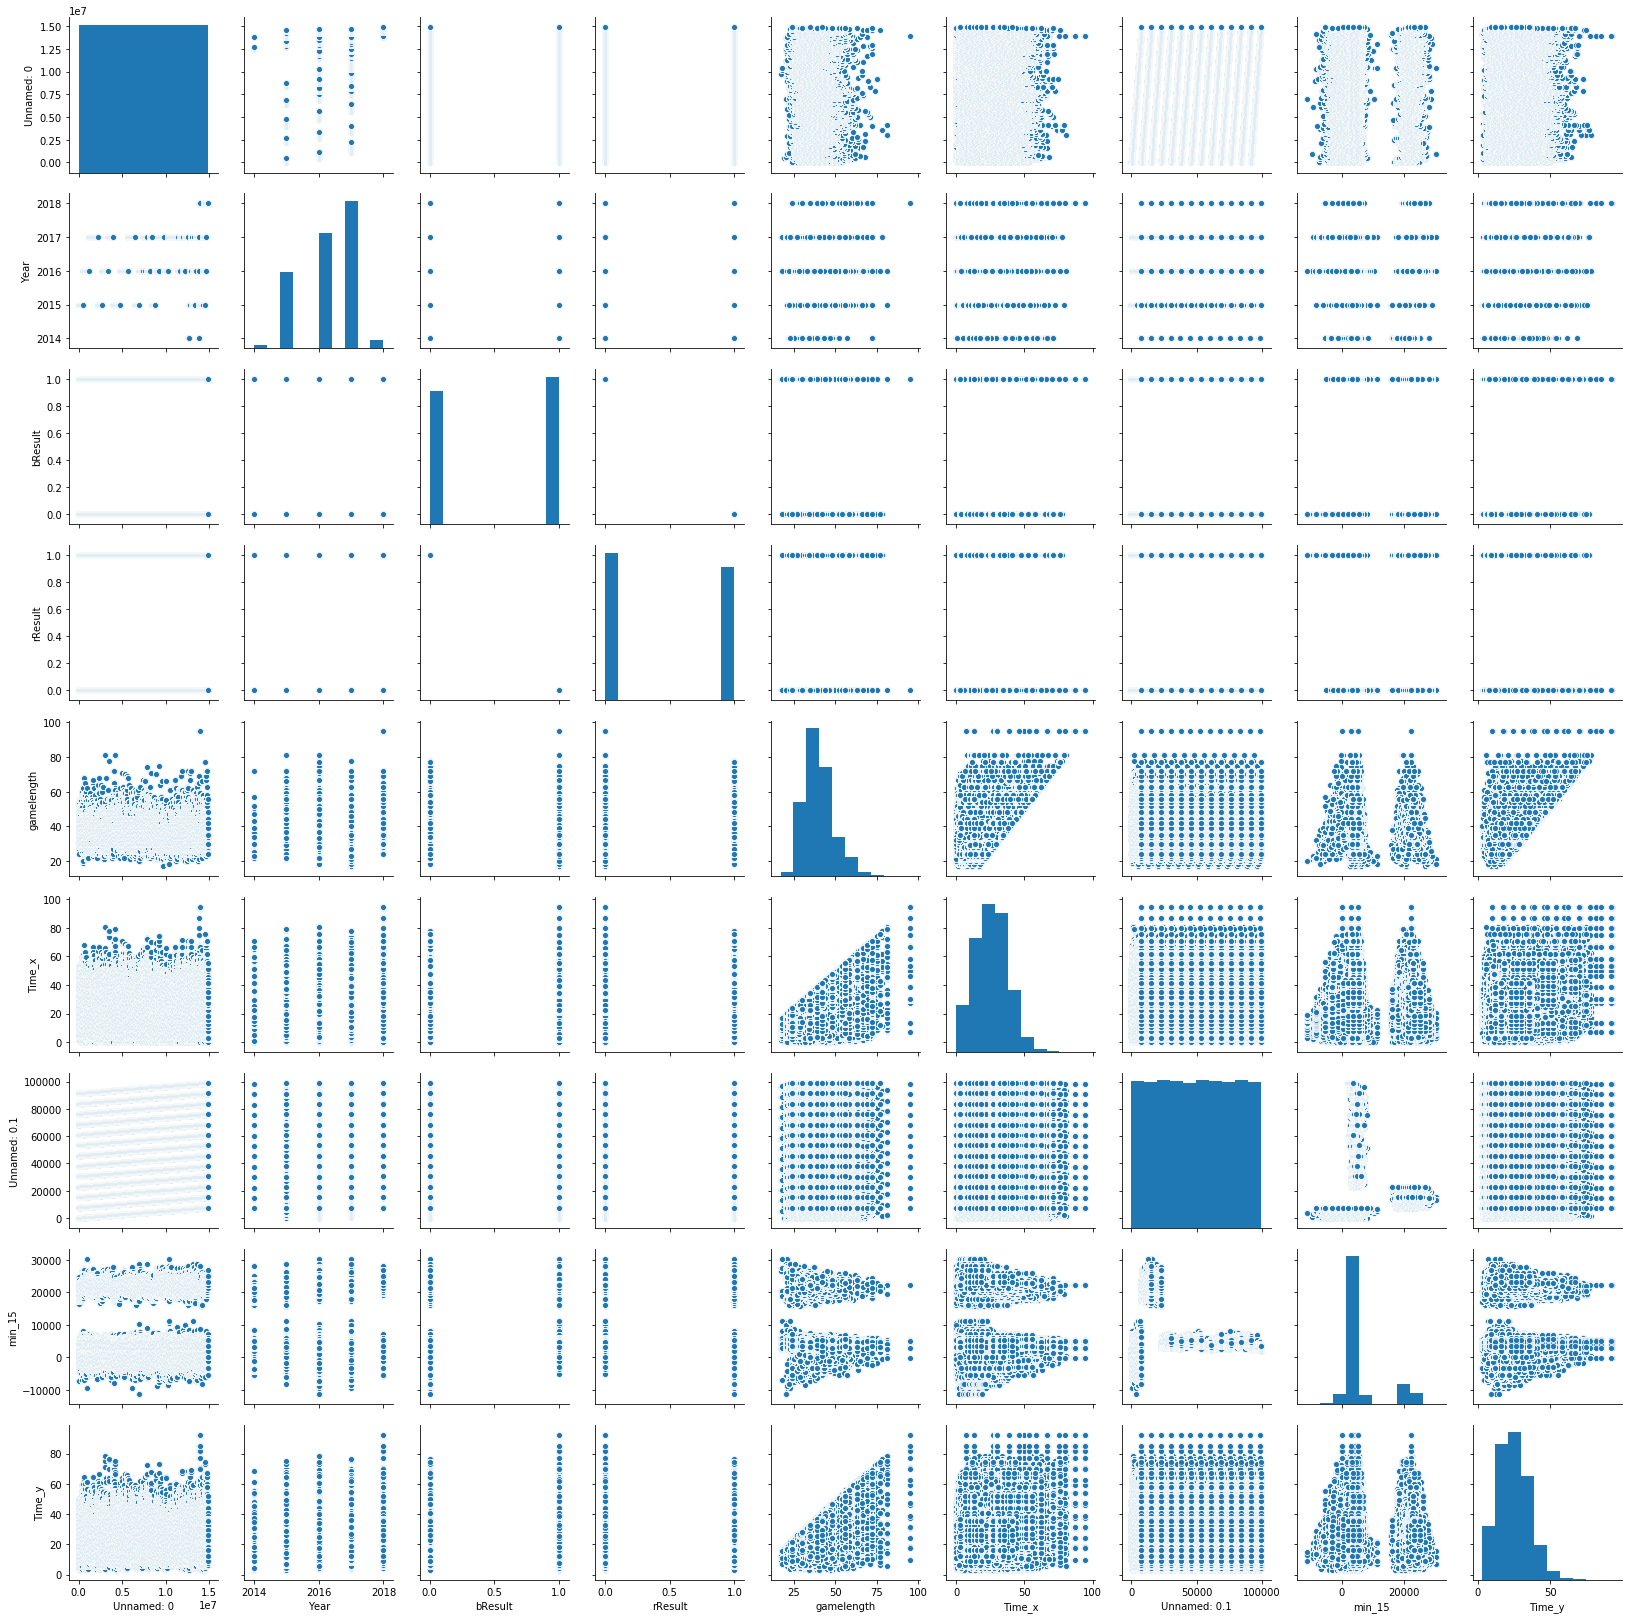

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

In [8]:
df.head()

,Unnamed: 0,League,Year,Season,Type_x,blueTeamTag,bResult,rResult,redTeamTag,gamelength,...,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Unnamed: 0.1,min_15,Team_y,Time_y,Type_y
0,0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,0,0,0,9229,8469,0,-790,bDragons,37.281250,DRAGON
1,1,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,0,0,0,9229,8469,0,-790,rDragons,17.140625,DRAGON
2,2,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,0,0,0,9229,8469,0,-790,rDragons,30.937500,DRAGON
3,3,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,0,0,0,9229,8469,0,-790,rDragons,24.640625,DRAGON
4,4,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,0,0,0,9229,8469,0,-790,rBarons,29.953125,BARON_NASHOR
